In [1]:
from scipy.io import loadmat
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (12,3)
rcParams['axes.xmargin'] = 0
import numpy as np


    1)Carregue os dados do arquivo Aula9-LFP1.mat.  Examine o sinal e identifique quais ritmos são visíveis. Calcule o espectro, os ritmos que aparecem no espectro são consistentes com a análise visual? Aplique o método de CFC visto na aula, para isto você precisa escolher as bandas de baixa e alta frequência. Descreva os resultados.
 
    2)Faça o mesmo que a questão anterior para os dados do arquivo Aula9-LFP2.mat

    3)Gere 100s de ruído gaussiano a 100 Hz. Calcule o CFC entre as bandas 5-7 Hz e 80-120 Hz. O que você esperava encontrar foi consistente com o resultado do CFC?
    4)No exemplo da sala usamos as bandas 5-7 Hz e 80-120 Hz. Refaça a análise utilizando a faixa 40-60 Hz para alta frequência.  Existe CFC entre as duas bandas?


#1

In [41]:
data1 = loadmat ('Aula9-LFP1.mat')


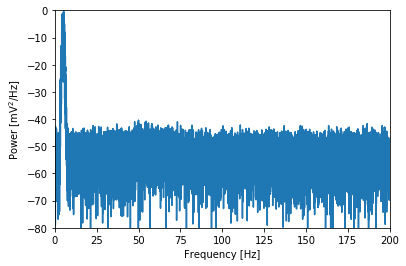

In [42]:
t = data1['t'][0]   
dt = t[1] - t[0]                     
T = t[-1] 
LFP = data1['LFP'][0]
N = len(LFP)                         

x = np.hanning(N) * LFP              
xf = np.fft.rfft(x - x.mean())       
Sxx = 2*dt**2/T * (xf*np.conj(xf))   
Sxx = np.real(Sxx)                   

df = 1 / T                           
fNQ = 1 / dt / 2                     

faxis = np.arange(0, fNQ + df, df)   
plt.plot(faxis, 10 * np.log10(Sxx))  
plt.xlim([0, 200])                   
plt.ylim([-80, 0])                   
plt.xlabel('Frequency [Hz]')         
plt.ylabel('Power [mV$^2$/Hz]');




In [57]:
from scipy import signal
Wn = [5,7]                        
n = 100                          
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming')
Vlo = signal.filtfilt(b, 1, LFP)

Wn = [80, 120]               
n = 100                            
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming')
Vhi = signal.filtfilt(b, 1, LFP)

x = np.hanning(N) * LFP              
xf = np.fft.rfft(x - x.mean())       
Sxx = 2*dt**2/T * (xf*np.conj(xf))   
Sxx = np.real(Sxx)

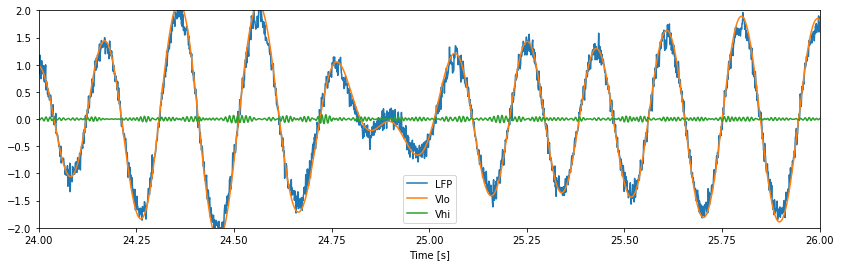

In [51]:
plt.figure(figsize=(14, 4))         
plt.plot(t, LFP)                    
plt.plot(t, Vlo)                    
plt.plot(t, Vhi)                    
plt.xlabel('Time [s]')
plt.xlim([24, 26]);                 
plt.ylim([-2, 2]);
plt.legend(['LFP', 'Vlo', 'Vhi'])




In [52]:
phi = np.angle(signal.hilbert(Vlo)) 
amp = abs(signal.hilbert(Vhi)) 


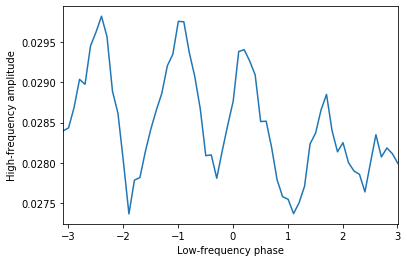

In [53]:
p_bins = np.arange(-np.pi, np.pi, 0.1) 
a_mean = np.zeros(np.size(p_bins)-1) 
p_mean = np.zeros(np.size(p_bins)-1) 
for k in range(np.size(p_bins)-1): 
    pL = p_bins[k]					 
    pR = p_bins[k+1]				 
    indices=(phi>=pL) & (phi<pR)	 
    a_mean[k] = np.mean(amp[indices])	
    p_mean[k] = np.mean([pL, pR])		
plt.plot(p_mean, a_mean) 
plt.ylabel('High-frequency amplitude') 
plt.xlabel('Low-frequency phase');


In [54]:
h = max(a_mean)-min(a_mean)
print(h) 



0.0024623454992136126


In [55]:
n_surrogates = 1000
hS = np.zeros(n_surrogates) 
for ns in range(n_surrogates): 
    ampS = amp[np.random.randint(0,N,N)] 	
    p_bins = np.arange(-np.pi, np.pi, 0.1) 
    a_mean = np.zeros(np.size(p_bins)-1) 
    p_mean = np.zeros(np.size(p_bins)-1) 
    for k in range(np.size(p_bins)-1): 
        pL = p_bins[k]
        pR = p_bins[k+1]				 
        indices=(phi>=pL) & (phi<pR)	 
        a_mean[k] = np.mean(ampS[indices])	
        p_mean[k] = np.mean([pL, pR])		
    hS[ns] = max(a_mean)-min(a_mean)


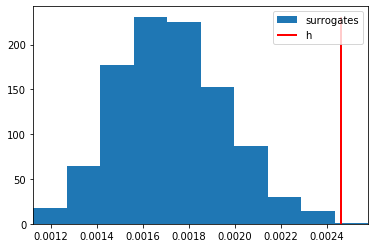

In [56]:
counts, _, _ = plt.hist(hS, label='surrogates') 
plt.vlines(h, 0, max(counts), colors='red', label='h', lw=2) 
plt.legend()


In [ ]:
#2

In [21]:
data2 = loadmat ('Aula9-LFP2.mat')


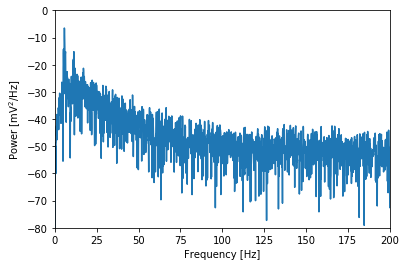

In [22]:
t = data2['t'][0]   
dt = t[1] - t[0]                     
T = t[-1] 
LFP = data2['LFP'][0]
N = len(LFP)                         

x = np.hanning(N) * LFP              
xf = np.fft.rfft(x - x.mean())       
Sxx = 2*dt**2/T * (xf*np.conj(xf))   
Sxx = np.real(Sxx)                   

df = 1 / T                           
fNQ = 1 / dt / 2                     

faxis = np.arange(0, fNQ + df, df)   
plt.plot(faxis, 10 * np.log10(Sxx))  
plt.xlim([0, 200])                   
plt.ylim([-80, 0])                   
plt.xlabel('Frequency [Hz]')         
plt.ylabel('Power [mV$^2$/Hz]');



In [24]:
from scipy import signal
Wn = [5,7]                        
n = 100                          
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming')
Vlo = signal.filtfilt(b, 1, LFP)

Wn = [80, 120]               
n = 100                            
b = signal.firwin(n, Wn, nyq=fNQ, pass_zero=False, window='hamming')
Vhi = signal.filtfilt(b, 1, LFP)


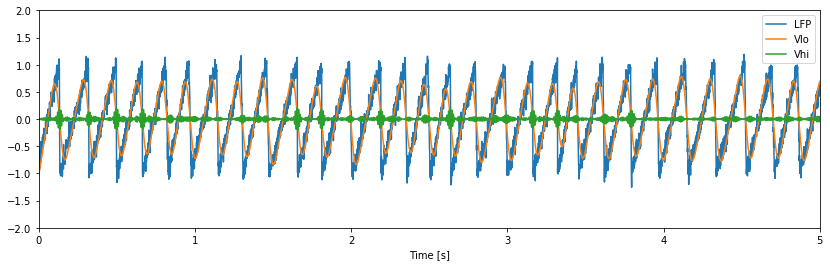

In [28]:
plt.figure(figsize=(14, 4))         
plt.plot(t, LFP)                    
plt.plot(t, Vlo)                    
plt.plot(t, Vhi)                    
plt.xlabel('Time [s]')
plt.xlim([0, 5])
plt.ylim([-2, 2]);
plt.legend(['LFP', 'Vlo', 'Vhi'])



In [58]:
phi = np.angle(signal.hilbert(Vlo)) 
amp = abs(signal.hilbert(Vhi)) 


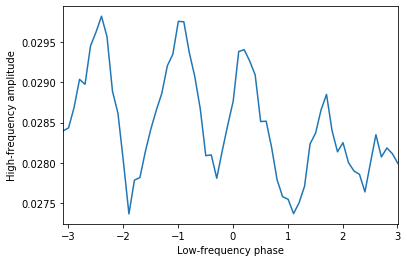

In [59]:
p_bins = np.arange(-np.pi, np.pi, 0.1) 
a_mean = np.zeros(np.size(p_bins)-1) 
p_mean = np.zeros(np.size(p_bins)-1) 
for k in range(np.size(p_bins)-1): 
    pL = p_bins[k]					 
    pR = p_bins[k+1]				 
    indices=(phi>=pL) & (phi<pR)	 
    a_mean[k] = np.mean(amp[indices])	
    p_mean[k] = np.mean([pL, pR])		
plt.plot(p_mean, a_mean) 
plt.ylabel('High-frequency amplitude') 
plt.xlabel('Low-frequency phase');


In [60]:
h = max(a_mean)-min(a_mean)
print(h) 


0.0024623454992136126


In [61]:
n_surrogates = 1000
hS = np.zeros(n_surrogates) 
for ns in range(n_surrogates): 
    ampS = amp[np.random.randint(0,N,N)] 	
    p_bins = np.arange(-np.pi, np.pi, 0.1) 
    a_mean = np.zeros(np.size(p_bins)-1) 
    p_mean = np.zeros(np.size(p_bins)-1) 
    for k in range(np.size(p_bins)-1): 
        pL = p_bins[k]
        pR = p_bins[k+1]				 
        indices=(phi>=pL) & (phi<pR)	 
        a_mean[k] = np.mean(ampS[indices])	
        p_mean[k] = np.mean([pL, pR])		
    hS[ns] = max(a_mean)-min(a_mean)

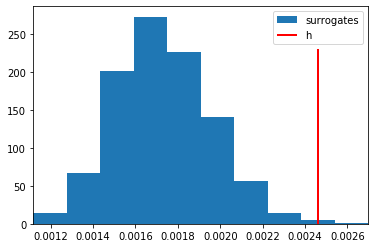

In [62]:
ounts, _, _ = plt.hist(hS, label='surrogates') 
plt.vlines(h, 0, max(counts), colors='red', label='h', lw=2) 
plt.legend()

In [ ]:
#3

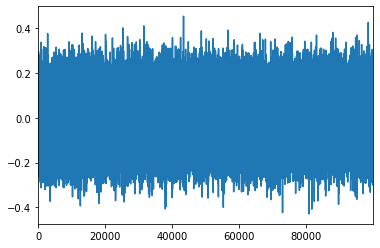

In [63]:
def gerar_ruido():
    fs = 1000
    T = 100
    N = T * fs
    ruido = np.random.normal(0, 0.1, N)
    return ruido

sinal = gerar_ruido()
plt.plot(sinal)

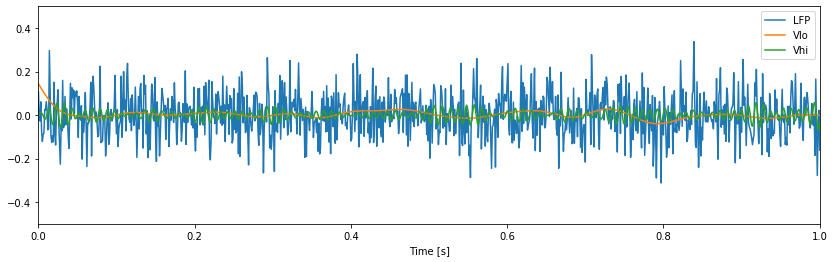

In [64]:
t3 = np.linspace(0,100,100*1000)
LFP3 = sinal
dt3 = t3[1]-t3[0]
fNQ3 = 1 / dt3 / 2  
N3 = 100*1000

Wn3 = [5,7]                        
n3 = 100                          
b3 = signal.firwin(n3, Wn3, nyq=fNQ3, pass_zero=False, window='hamming')
Vlo3 = signal.filtfilt(b3, 1, LFP3)

Wn3 = [80, 120]               
n3 = 100                            
b3 = signal.firwin(n3, Wn3, nyq=fNQ3, pass_zero=False, window='hamming')
Vhi3 = signal.filtfilt(b3, 1, LFP3)

plt.figure(figsize=(14, 4))         
plt.plot(t3, LFP3)                    
plt.plot(t3, Vlo3)                    
plt.plot(t3, Vhi3)                    
plt.xlabel('Time [s]')
plt.xlim([0, 1]);                 
plt.ylim([-0.5, 0.5]);
plt.legend(['LFP', 'Vlo', 'Vhi'])

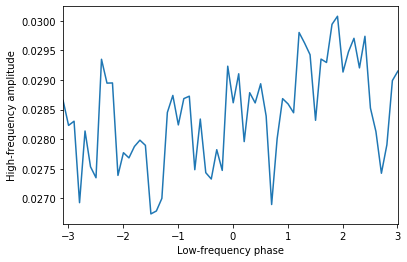

In [67]:
phi3 = np.angle(signal.hilbert(Vlo3))
amp3 = abs(signal.hilbert(Vhi3))
p_bins = np.arange(-np.pi, np.pi, 0.1) 
a_mean = np.zeros(np.size(p_bins)-1) 
p_mean = np.zeros(np.size(p_bins)-1) 
for k in range(np.size(p_bins)-1): 
    pL = p_bins[k]
    pR = p_bins[k+1]
    indices=(phi3>=pL) & (phi3<pR)
    a_mean[k] = np.mean(amp3[indices])
    p_mean[k] = np.mean([pL, pR])
plt.plot(p_mean, a_mean) 
plt.ylabel('High-frequency amplitude') 
plt.xlabel('Low-frequency phase');